# Production System Assignment

In [1]:
from __future__ import annotations

import random
import statistics
from collections.abc import Callable, Sequence

import numpy as np
import simpy
from scipy import stats
from simpy.events import ProcessGenerator
from lib.server import Server
from lib.job import Job
from matplotlib import pyplot as plt

In [2]:
seeds = [
    6145,
    4098,
    6148,
    2055,
    4103,
    8200,
    2058,
    2062,
    6159,
    6161,
    18,
    2067,
    20,
    4117,
    2039,
    4115,
    6164,
    24,
    4123,
    4124,
    6173,
    29,
    8221,
    2081,
    6177,
    40,
    4137,
    42,
    45,
    6189,
    8240,
    2098,
    4146,
    8249,
    8252,
    8253,
    4159,
    8259,
    4164,
    6213,
    4168,
    72,
    6220,
    2124,
    8270,
    8268,
    80,
    4178,
    6229,
    8278,
    87,
    4185,
    2139,
    92,
    8283,
    8286,
    4192,
    8290,
    6245,
    4198,
    104,
    2153,
    4207,
    6257,
    2161,
    113,
    4210,
    4213,
    4214,
    8311,
    120,
    6265,
    4219,
    126,
    2175,
    6274,
    4226,
    6275,
    4232,
    2186,
    138,
    2189,
    4240,
    145,
    8338,
    2196,
    149,
    8342,
    8343,
    2200,
    6297,
    154,
    155,
    156,
    8350,
    2209,
    8356,
    2213,
    8358,
    165,
    2216,
    2218,
    6317,
    6318,
    6320,
    177,
    4274,
    8371,
    8372,
    2230,
    6327,
    184,
    186,
    4284,
    2239,
    2242,
    2243,
    6340,
    6346,
    4305,
    6353,
    8411,
    220,
    8413,
    8414,
    6368,
    6370,
    6374,
    4327,
    4329,
    6378,
    2284,
    237,
    4336,
    6384,
    244,
    2295,
    6392,
    2298,
    8444,
    252,
    6396,
    2304,
    4353,
    259,
    6406,
    8456,
    2313,
    4363,
    8460,
    270,
    6416,
    273,
    2322,
    2323,
    6417,
    6426,
    6430,
    8480,
    2338,
    293,
    2342,
    8487,
    4392,
    8491,
    300,
    4396,
    4398,
    2352,
    8496,
    2356,
    8505,
    4413,
    8513,
    8515,
    4420,
    325,
    4421,
    323,
    8520,
    6473,
    8522,
    2380,
    8525,
    6478,
    336,
    4433,
    338,
    337,
    8535,
    4442,
    2395,
    4450,
    6502,
    2406,
    2409,
    2410,
    4460,
    8558,
    2415,
    8563,
    373,
    4470,
    2423,
    6518,
    8571,
    4479,
    383,
    8582,
    391,
    390,
    2441,
    399,
    6544,
    401,
    8598,
    2458,
    4508,
    2460,
    413,
    2464,
    6561,
    2465,
    8608,
    422,
    423,
    8615,
    6566,
    6567,
    6571,
    6575,
    8624,
    440,
    2492,
    8637,
    446,
    6594,
    4546,
    6595,
    4547,
    454,
    8650,
    463,
    464,
    8657,
    8655,
    2516,
    2518,
    6617,
    6619,
    4572,
    477,
    4579,
    6631,
    8679,
    8685,
    6638,
    2543,
    6643,
    8691,
    6644,
    6648,
    506,
    4603,
    2563,
    2565,
    8714,
    525,
    8718,
    4626,
    4628,
    2582,
    2583,
    6684,
    6689,
    6690,
    6691,
    8740,
    8741,
    550,
    2606,
    2607,
    6704,
    4658,
    4666,
    8763,
    8764,
    574,
    4671,
    578,
    584,
    8776,
    2633,
    2635,
    8784,
    8794,
    2655,
    2667,
    6765,
    624,
    625,
    6770,
    2672,
    2676,
    6775,
    637,
    6782,
    2685,
    4734,
    4738,
    8835,
    8834,
    2696,
    6799,
    8851,
    6804,
    2709,
    6806,
    8854,
    4762,
    2718,
    8863,
    673,
    8869,
    677,
    6824,
    681,
    6828,
    4788,
    8885,
    693,
    8891,
    702,
    705,
    8897,
    2757,
    6853,
    4809,
    2762,
    715,
    2763,
    2768,
    8919,
    4823,
    8921,
    4826,
    6881,
    2788,
    6884,
    4838,
    4837,
    746,
    4843,
    8945,
    8948,
    4853,
    2806,
    759,
    2811,
    764,
    6909,
    766,
    8964,
    2825,
    8973,
    781,
    8975,
    2832,
    6929,
    6931,
    788,
    8981,
    8982,
    6935,
    791,
    2839,
    4890,
    6939,
    6941,
    8990,
    8993,
    801,
    2849,
    2853,
    2854,
    6950,
    2861,
    4912,
    2865,
    818,
    9010,
    6965,
    6966,
    4921,
    4924,
    4925,
    6977,
    4932,
    2886,
    9031,
    9035,
    6988,
    845,
    844,
    2895,
    6995,
    2906,
    2907,
    4955,
    2908,
    7007,
    9055,
    4963,
    2916,
    9064,
    2924,
    2931,
    884,
    9077,
    9075,
    9079,
    7031,
    9081,
    7029,
    9083,
    9084,
    9085,
    2934,
    2944,
    7043,
    2948,
    4997,
    4999,
    9095,
    5003,
    7054,
    9103,
    913,
    7057,
    7058,
    2964,
    918,
    9112,
    921,
    2969,
    2972,
    7069,
    2975,
    5025,
    9130,
    5038,
    9134,
    9138,
    2995,
    949,
    953,
    9146,
    9149,
    957,
    960,
    9153,
    7108,
    9157,
    968,
    5065,
    5069,
    3025,
    7121,
    978,
    3028,
    9169,
    7122,
    9172,
    992,
    3045,
    7147,
    5100,
    1003,
    9198,
    9202,
    3058,
    3060,
    1010,
    1014,
    9206,
    9208,
    7159,
    3066,
    3064,
    1016,
    9213,
    1022,
    3062,
    7163,
    5121,
    9224,
    1033,
    1034,
    5131,
    7181,
    1038,
    7184,
    3088,
    5136,
    5138,
    1048,
    5146,
    1054,
    1056,
    7200,
    7204,
    9253,
    3109,
    3117,
    7214,
    5167,
    1072,
    1071,
    5170,
    7220,
    7221,
    7225,
    7226,
    1086,
    9283,
    9285,
    1094,
    9286,
    1095,
    7241,
    3143,
    9291,
    1099,
    9293,
    3142,
    7247,
    9295,
    5201,
    9298,
    3149,
    3156,
    9301,
    5206,
    9303,
    7259,
    5212,
    3167,
    7264,
    9315,
    5220,
    5219,
    1126,
    1128,
    9320,
    1130,
    7276,
    7277,
    7279,
    9328,
    9333,
    1147,
    9343,
    3201,
    7298,
    9347,
    7299,
    1158,
    5255,
    3209,
    1161,
    5261,
    7311,
    5265,
    1178,
    5275,
    1181,
    9373,
    5278,
    3233,
    7333,
    3238,
    5287,
    3240,
    3241,
    3242,
    5289,
    5288,
    7341,
    1198,
    3239,
    7349,
    9400,
    5305,
    5310,
    5311,
    1214,
    5316,
    5318,
    9419,
    7373,
    9422,
    9424,
    7377,
    3280,
    7379,
    9429,
    5334,
    3287,
    3286,
    7384,
    3295,
    7392,
    1248,
    1251,
    5348,
    9447,
    9448,
    1257,
    3305,
    7408,
    9456,
    7413,
    3322,
    5372,
    7421,
    3327,
    9473,
    9477,
    7436,
    9489,
    3346,
    7445,
    5402,
    7452,
    9505,
    7461,
    3366,
    1319,
    5418,
    9515,
    7475,
    3380,
    9525,
    1334,
    7479,
    9528,
    5433,
    5430,
    9532,
    7484,
    5445,
    5446,
    7495,
    9544,
    7496,
    9541,
    7493,
    3398,
    3405,
    7501,
    9550,
    9549,
    5448,
    7500,
    1365,
    7514,
    1373,
    3422,
    9565,
    3424,
    7521,
    3426,
    9571,
    3427,
    1378,
    3431,
    5480,
    3432,
    1387,
    3435,
    7532,
    5488,
    7536,
    3442,
    1397,
    1400,
    9593,
    7546,
    1414,
    9607,
    3464,
    9614,
    1424,
    1097,
    5522,
    9618,
    7574,
    1431,
    1432,
    9624,
    5532,
    3485,
    9633,
    9634,
    1443,
    1444,
    7590,
    9643,
    1459,
    3509,
    3515,
    3517,
    5567,
    7617,
    3522,
    3521,
    7622,
    9672,
    5577,
    5579,
    1483,
    5581,
    3534,
    7631,
    5586,
    1493,
    3146,
    1496,
    3545,
    5594,
    9691,
    1502,
    5598,
    9698,
    1507,
    5604,
    3557,
    9701,
    1511,
    9704,
    5608,
    7653,
    5614,
    9711,
    1523,
    9715,
    9720,
    3577,
    3579,
    3580,
    5629,
    3582,
    7677,
    5634,
    3587,
    5636,
    3592,
    3596,
    9743,
    3600,
    1553,
    7698,
    7703,
    1561,
    3622,
    7719,
    7718,
    3625,
    3626,
    9771,
    5676,
    9770,
    7726,
    1578,
    1585,
    5686,
    5687,
    9784,
    3644,
    1598,
    3647,
    9791,
    5697,
    9794,
    7747,
    5700,
    5701,
    9799,
    3655,
    7755,
    3666,
    9810,
    1623,
    7769,
    7771,
    9819,
    5725,
    5728,
    7779,
    1638,
    3687,
    3688,
    1641,
    5738,
    1646,
    9838,
    1649,
    9843,
    7800,
    7802,
    5759,
    3712,
    1663,
    5764,
    7812,
    7818,
    9869,
    3726,
    9870,
    1679,
    7823,
    9880,
    5785,
    5788,
    5789,
    5790,
    3742,
    1696,
    9889,
    5794,
    1697,
    9885,
    3751,
    1704,
    3753,
    7848,
    5807,
    1712,
    7857,
    3761,
    5812,
    7861,
    3766,
    3767,
    7865,
    1721,
    3771,
    9915,
    7869,
    1726,
    3775,
    8076,
    3777,
    7874,
    9922,
    7876,
    3780,
    5829,
    3783,
    5827,
    3786,
    5834,
    9933,
    9934,
    9941,
    5847,
    7899,
    5852,
    1763,
    7907,
    7911,
    5863,
    5865,
    7913,
    1770,
    7916,
    5871,
    5873,
    3826,
    1777,
    1783,
    5880,
    5882,
    9979,
    9980,
    5885,
    3838,
    3839,
    1792,
    9986,
    3842,
    5892,
    3851,
    9996,
    7952,
    3857,
    5904,
    1808,
    7957,
    7960,
    7965,
    7967,
    1829,
    3879,
    1833,
    7981,
    5936,
    7985,
    1844,
    1854,
    3903,
    8001,
    3913,
    1866,
    8014,
    3921,
    3922,
    8021,
    5974,
    3926,
    8026,
    5979,
    3934,
    5983,
    8032,
    5985,
    1890,
    5987,
    1892,
    1893,
    5993,
    1897,
    1900,
    8045,
    3953,
    8050,
    1908,
    1913,
    6010,
    3970,
    1922,
    3972,
    3974,
    3979,
    1932,
    3980,
    8078,
    6030,
    6032,
    3985,
    6034,
    8080,
    8081,
    3989,
    3991,
    3994,
    3995,
    1956,
    8102,
    6056,
    6060,
    1965,
    4016,
    4017,
    8117,
    4022,
    1974,
    4024,
    8120,
    8122,
    6075,
    6072,
    6077,
    6082,
    4041,
    1993,
    1994,
    8143,
    6095,
    8147,
    6105,
    2010,
    4058,
    2012,
    6106,
    6107,
    2013,
    8160,
    6113,
    2018,
    4066,
    6114,
    8166,
    2024,
    4081,
    4085,
    8182,
    8183,
    8189,
    6143,
]

In [2]:
class System:
    def __init__(
        self,
        env: simpy.Environment,
        inter_arrival_time_distribution: Callable[[], float],
        processing_time_per_family_distribution: list[Callable[[], float]],
        families_distribution: Callable[[], float],
        due_dates_distribution: Callable[[], float],
        routing_distribution: dict[int, list[Callable[[], float]]],
        routing_prob: dict[int, list[float]],
        release_interval: float = 60
    ) -> None:
        self.env = env
        self.inter_arrival_time_distribution = inter_arrival_time_distribution
        self.processing_time_per_family_distribution = processing_time_per_family_distribution
        self.families_distribution = families_distribution
        self.due_dates_distribution = due_dates_distribution
        self.routing_distribution = routing_distribution
        self.routing_prob = routing_prob
        self.release_interval = release_interval

        self.machines: list[Server] = []
        for i in range(6):
            server = Server(self.env, 1, "WC{}".format(i+1))
            self.machines.append(server)

        self.jobs: list[Job] = []

        self.pre_shop_pool: list[Job] = []

        self.th_stats = [0]
        self.last_total_th = 0

        self.late_jobs: list[bool] =[]
        self.jobs_time_in_system: list[float] = []

        self.tis_stats: list[float] = []
        self.jobs_completed_in_current_interval: list[Job] = []

        self.tardiness_stats: list[float] = []
        self.earliness_stats: list[float] = []
        self.tardiness_values_in_current_interval: list[float] = []
        self.earliness_values_in_current_interval: list[float] = []

        self.jobs_in_system: int = 0
        self.wip_stats: list[int] = []

        self.env.process(self.run())
        self.env.process(self.stats_sampler())
        self.env.process(self.release_job_from_psp())

    @property
    def finished_jobs(self) -> int:
        return sum(job.done for job in self.jobs)

    def stats_sampler(self):
        while True:
            yield self.env.timeout(60)

            delta = self.finished_jobs - self.last_total_th
            self.th_stats.append(delta)
            self.last_total_th = self.finished_jobs

            if self.jobs_completed_in_current_interval:
                mean_tis = statistics.mean([j.time_in_system for j in self.jobs_completed_in_current_interval if j.time_in_system is not None])
                self.tis_stats.append(mean_tis)
                self.jobs_completed_in_current_interval = []
            else:
                self.tis_stats.append(0.0)

            if self.tardiness_values_in_current_interval:
                mean_tardiness = statistics.mean(self.tardiness_values_in_current_interval)
                self.tardiness_stats.append(mean_tardiness)
                self.tardiness_values_in_current_interval = []
            else:
                self.tardiness_stats.append(0.0)

            if self.earliness_values_in_current_interval:
                mean_earliness = statistics.mean(self.earliness_values_in_current_interval)
                self.earliness_stats.append(mean_earliness)
                self.earliness_values_in_current_interval = []
            else:
                self.earliness_stats.append(0.0)

            self.wip_stats.append(self.jobs_in_system)


    def job_completed_callback(self, job: Job):
        self.jobs_in_system -= 1
        self.late_jobs.append(job.is_late)
        self.jobs_time_in_system.append(job.time_in_system)
        self.earliness_values_in_current_interval.append(job.earliness)
        self.tardiness_values_in_current_interval.append(job.tardiness)
        if job.time_in_system is not None:
            self.jobs_completed_in_current_interval.append(job)

    def run(self) -> ProcessGenerator:
        idx = 0
        while True:
            timeout_inter_arrival = self.inter_arrival_time_distribution()
            weight = self.families_distribution()
            if weight <= 0.1:
                family = 1
            elif weight <= 0.62:
                family = 2
            else:
                family = 3
            processing_time = self.processing_time_per_family_distribution[family-1]()
            due_date_offset = self.due_dates_distribution()

            family_routing_distr = self.routing_distribution[family]
            family_routing_prob = self.routing_prob[family]

            job_routing = []
            for i in range(6):
                if family_routing_distr[i]() <= family_routing_prob[i]:
                    job_routing.append(self.machines[i])

            yield self.env.timeout(timeout_inter_arrival)

            job = Job(
                env=self.env,
                routing=job_routing,
                arrival_time=self.env.now,
                process_time=processing_time,
                due_date=(self.env.now + due_date_offset),
                idx=idx,
                family="F{}".format(family),
                completion_callback=self.job_completed_callback
            )

            idx += 1
            self.jobs.append(job)
            self.jobs_in_system += 1
            self.pre_shop_pool.append(job)

    def release_job_from_psp(self):
        while True:
            yield self.env.timeout(self.release_interval)

            if self.pre_shop_pool:
                job_to_release = self.pre_shop_pool.pop(0)
                self.env.run(job_to_release.main())

In [25]:
N = 10
M = N + 100
O = M + 100
P = O + 100
Q = P + 100
R = Q + 100
S = R + 100
T = S + 100
U = T + 10
V = U + 100

In [4]:
def run_system(seed: int | None, until: float = 60*120) -> System:
    random.seed(seed)
    production_system = System(
        env=simpy.Environment(),
        inter_arrival_time_distribution=lambda: random.expovariate(lambd=0.65),
        processing_time_per_family_distribution=[
            lambda: random.gammavariate(2,2),
            lambda: random.gammavariate(4,0.5),
            lambda: random.gammavariate(6,1/6)
        ],
        families_distribution=lambda: random.random(),
        routing_distribution={
            1: [lambda: random.random(), lambda: random.random(), lambda: random.random(),lambda: random.random(),lambda: random.random(),lambda: random.random()],
            2: [lambda: random.random(), lambda: random.random(), lambda: random.random(),lambda: random.random(),lambda: random.random(),lambda: random.random()],
            3: [lambda: random.random(), lambda: random.random(), lambda: random.random(),lambda: random.random(),lambda: random.random(),lambda: random.random()]
        },
        routing_prob={
            1: [1,1,0,1,1,1],
            2: [0.8, 0.8, 1, 0.8, 0.8, 0.75],
            3: [0,0,1,0,0,0.75]
        },
        due_dates_distribution=lambda: random.uniform(30,50)
    )
    production_system.env.run(until=until)
    return production_system

def main_system(*seeds: int, until) -> list[System]:
    return [run_system(seed, until=until) for seed in seeds]

In [5]:
class Welch:
    def __init__(self, process: np.ndarray, window_size: int, tol: float) -> None:
        self.process = process
        self.window_size = window_size
        self.tol = tol
        self.replications_mean = np.mean(process, axis=0)
        self.averaged_process = self._welch()
        self.diff, self.warmup_period = self._find_steady_state()

    @staticmethod
    def moving_average(arr: np.ndarray, window_size: int) -> np.ndarray:
        weights = np.ones(window_size) / window_size
        return np.convolve(arr, weights, mode="valid")

    def _welch(self) -> np.ndarray:
        averaged_process = []
        for i in range(1, self.replications_mean.shape[0] - self.window_size):
            if i <= self.window_size:
                averaged_process.append(self.replications_mean[: 2 * i - 1].mean())
            else:
                # averaged_process.append(
                #    self.replications_mean[
                #        i - self.window_size // 2 : i + self.window_size // 2
                #    ].mean()
                #)
                averaged_process.append(
                    self.replications_mean[
                        (i - 1 - self.window_size) : (i + self.window_size)
                    ].mean()
                )
        return np.array(averaged_process)

    def _find_steady_state(self) -> tuple[np.ndarray, int]:
        arr = self.averaged_process# self.moving_average(self.averaged_process, self.window_size)
        diff = np.diff(arr.flatten())
        for i, d in enumerate(diff):
            if d < self.tol:
                return diff, i + self.window_size
        return diff, -1

    def plot(self):
        plt.plot(self.averaged_process, label="Averaged Process")
        plt.axvline(
            self.warmup_period,
            color="r",
            linestyle="--",
            label=f"Warmup period: {self.warmup_period}",
        )
        plt.legend(loc="best")
        plt.show()


## Benchmark Statistics:
## Hourly Throughput, Mean time in System, Earliness and Tardiness, WIP

## Hourly Throughput Stats Evaluation

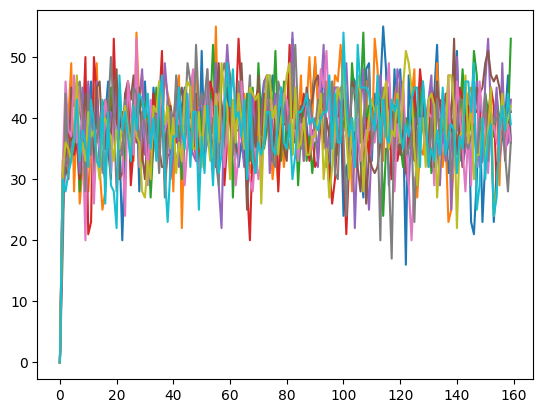

In [8]:
system_runs = main_system(*seeds[:N], until=60 * 160)
system_arr = np.array([run.th_stats for run in system_runs])
plt.plot(system_arr.T)
plt.show()

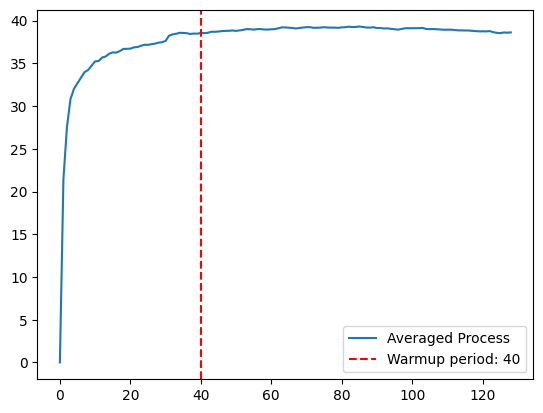

In [9]:
welch = Welch(system_arr, window_size=30, tol=0.1)
welch.plot()

In [10]:
hourly_throughput_warmup_period = welch.warmup_period

In [11]:
def t_student_critical_value(alpha: float, n: int):
    return stats.t.ppf(1 - alpha, n - 1)

In [12]:
def analyze_hourly_throughput(
    runs: Sequence[System], warmup_period: int, alpha: float = 0.05
) -> tuple[float, float, float]:
    n = len(runs)
    sample = [statistics.mean(run.th_stats[warmup_period:]) for run in runs]
    throughput_sample_mean = statistics.mean(sample)
    throughput_sample_variance = statistics.variance(
        sample, xbar=throughput_sample_mean
    )
    t = t_student_critical_value(alpha=alpha, n=n)
    half_interval = t * np.sqrt(throughput_sample_variance / n)
    return throughput_sample_mean, throughput_sample_variance, half_interval

In [13]:
system_runs = main_system(*seeds[N:M], until=60 * 160)
alpha = 0.05
throughput_sample_mean, throughput_sample_variance, half_interval = (
    analyze_hourly_throughput(
        system_runs, warmup_period=hourly_throughput_warmup_period, alpha=alpha
    )
)
print(f"Throughput Sample Mean: {throughput_sample_mean:.2f}")
print(f"Throughput Sample Variance: {throughput_sample_variance:.2f}")
print(f"Half Interval: {half_interval:.2f}")
print(
    f"Confidence Interval [{alpha=}]: ({throughput_sample_mean - half_interval:.2f}, {throughput_sample_mean + half_interval:.2f})"
)
print(f"Relative Error: {100 * half_interval / throughput_sample_mean:.2f}%")

Throughput Sample Mean: 39.16
Throughput Sample Variance: 0.33
Half Interval: 0.10
Confidence Interval [alpha=0.05]: (39.07, 39.26)
Relative Error: 0.25%


## Time in System Stats Evaluation

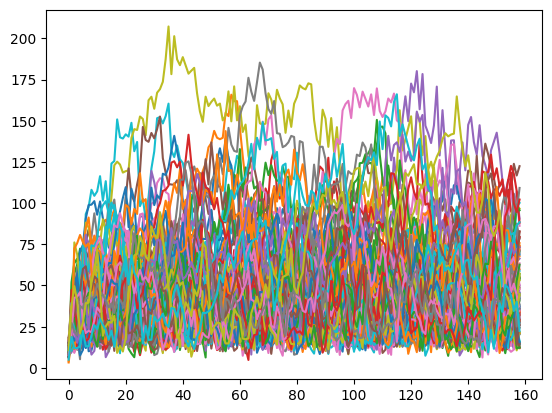

(100, 159)

In [14]:
system_runs = main_system(*seeds[M:O], until=60 * 160)
tis_series_list = [run.tis_stats for run in system_runs]
min_len = min(len(s) for s in tis_series_list)
truncated_tis_series = [s[:min_len] for s in tis_series_list]
system_arr = np.array(truncated_tis_series)
plt.plot(system_arr.T)
plt.show()
system_arr.shape

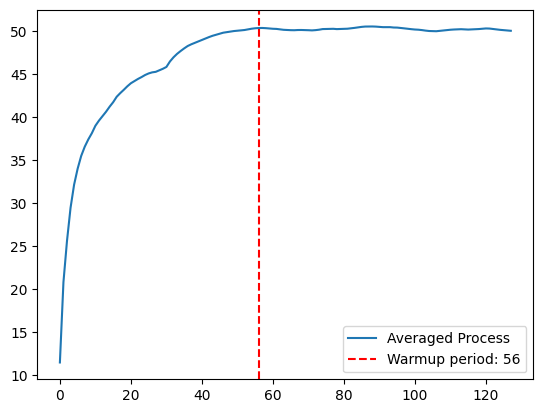

In [15]:
welch = Welch(system_arr, window_size=30, tol=0.1)
welch.plot()

In [16]:
tis_warmup_period = welch.warmup_period

In [17]:
def analyze_time_in_system(
    runs: Sequence[System], warmup_period: int, alpha: float = 0.05
) -> tuple[float, float, float]:
    n = len(runs)
    sample = [statistics.mean(run.tis_stats[warmup_period:]) for run in runs]
    tis_sample_mean = statistics.mean(sample)
    tis_sample_variance = statistics.variance(
        sample, xbar=tis_sample_mean
    )
    t = t_student_critical_value(alpha=alpha, n=n)
    half_interval = t * np.sqrt(tis_sample_variance / n)
    return tis_sample_mean, tis_sample_variance, half_interval

In [18]:
system_runs = main_system(*seeds[O:P], until=60 * 160)
alpha = 0.05
tis_sample_mean, tis_sample_variance, half_interval = (
    analyze_time_in_system(
        system_runs, warmup_period=tis_warmup_period, alpha=alpha
    )
)
print(f"Time in System Sample Mean: {tis_sample_mean:.2f}")
print(f"Time in System Sample Variance: {tis_sample_variance:.2f}")
print(f"Half Interval: {half_interval:.2f}")
print(
    f"Confidence Interval [{alpha=}]: ({tis_sample_mean - half_interval:.2f}, {tis_sample_mean + half_interval:.2f})"
)
print(f"Relative Error: {100 * half_interval / tis_sample_mean:.2f}%")

Time in System Sample Mean: 49.88
Time in System Sample Variance: 177.03
Half Interval: 2.21
Confidence Interval [alpha=0.05]: (47.67, 52.09)
Relative Error: 4.43%


## Tardiness Stats Evaluation

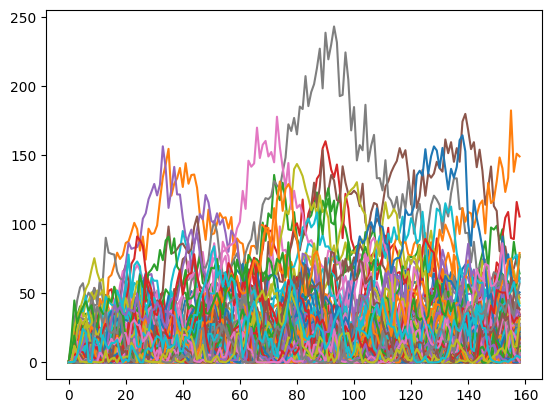

In [29]:
system_runs = main_system(*seeds[P:Q], until=60 * 160)
system_arr = np.array([run.tardiness_stats for run in system_runs])
plt.plot(system_arr.T)
plt.show()

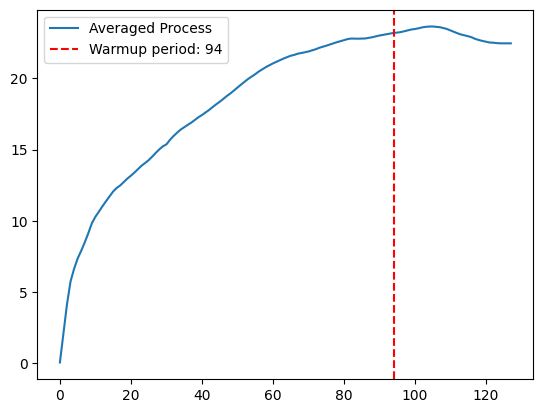

In [30]:
welch = Welch(system_arr, window_size=30, tol=0.1)
welch.plot()

In [31]:
tardiness_warmup_period = welch.warmup_period

In [37]:
def analyze_tardiness(
    runs: Sequence[System], warmup_period: int, alpha: float = 0.05
) -> tuple[float, float, float]:
    n = len(runs)
    sample = [statistics.mean(run.tardiness_stats[warmup_period:]) for run in runs]
    tardiness_sample_mean = statistics.mean(sample)
    tardiness_sample_variance = statistics.variance(
        sample, xbar=tardiness_sample_mean
    )
    t = t_student_critical_value(alpha=alpha, n=n)
    half_interval = t * np.sqrt(tardiness_sample_variance / n)
    return tardiness_sample_mean, tardiness_sample_variance, half_interval

In [38]:
system_runs = main_system(*seeds[Q:R], until=60 * 160)
alpha = 0.05
tardiness_sample_mean, tardiness_sample_variance, half_interval = (
    analyze_time_in_system(
        system_runs, warmup_period=tardiness_warmup_period, alpha=alpha
    )
)
print(f"Tardiness Sample Mean: {tardiness_sample_mean:.2f}")
print(f"Tardiness Sample Variance: {tardiness_sample_variance:.2f}")
print(f"Half Interval: {half_interval:.2f}")
print(
    f"Confidence Interval [{alpha=}]: ({tardiness_sample_mean - half_interval:.2f}, {tardiness_sample_mean + half_interval:.2f})"
)
print(f"Relative Error: {100 * half_interval / tardiness_sample_mean:.2f}%")

Tardiness Sample Mean: 52.11
Tardiness Sample Variance: 349.79
Half Interval: 3.11
Confidence Interval [alpha=0.05]: (49.00, 55.21)
Relative Error: 5.96%


## Tardiness Stats Evaluation

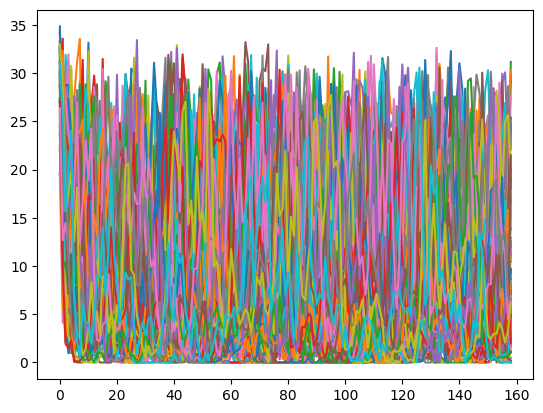

In [39]:
system_runs = main_system(*seeds[R:S], until=60 * 160)
system_arr = np.array([run.earliness_stats for run in system_runs])
plt.plot(system_arr.T)
plt.show()

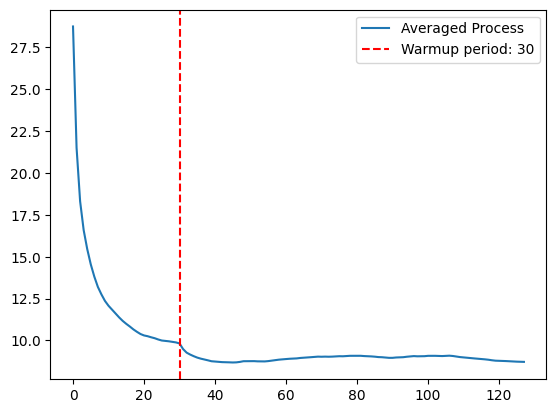

In [40]:
welch = Welch(system_arr, window_size=30, tol=0.1)
welch.plot()

In [41]:
earliness_warmup_period = welch.warmup_period

In [42]:
def analyze_earliness(
    runs: Sequence[System], warmup_period: int, alpha: float = 0.05
) -> tuple[float, float, float]:
    n = len(runs)
    sample = [statistics.mean(run.earliness_stats[warmup_period:]) for run in runs]
    earliness_sample_mean = statistics.mean(sample)
    earliness_sample_variance = statistics.variance(
        sample, xbar=earliness_sample_mean
    )
    t = t_student_critical_value(alpha=alpha, n=n)
    half_interval = t * np.sqrt(earliness_sample_variance / n)
    return earliness_sample_mean, earliness_sample_variance, half_interval

In [43]:
system_runs = main_system(*seeds[S:T], until=60 * 160)
alpha = 0.05
earliness_sample_mean, earliness_sample_variance, half_interval = (
    analyze_time_in_system(
        system_runs, warmup_period=earliness_warmup_period, alpha=alpha
    )
)
print(f"Earliness Sample Mean: {earliness_sample_mean:.2f}")
print(f"Earliness Sample Variance: {earliness_sample_variance:.2f}")
print(f"Half Interval: {half_interval:.2f}")
print(
    f"Confidence Interval [{alpha=}]: ({earliness_sample_mean - half_interval:.2f}, {earliness_sample_mean + half_interval:.2f})"
)
print(f"Relative Error: {100 * half_interval / earliness_sample_mean:.2f}%")

Earliness Sample Mean: 51.67
Earliness Sample Variance: 161.17
Half Interval: 2.11
Confidence Interval [alpha=0.05]: (49.56, 53.77)
Relative Error: 4.08%
